In [1]:
import pandas as pd
import numpy as np

from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
from pykrx import stock
import FinanceDataReader as fdr
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
def myplot(df, nrows=5,  kind='line', title='제목', labels=False):  
    if nrows > 0:
        print(df.head(nrows))
    else:
        print(df.tail(nrows))
    
    if labels:
        cols = df.columns
        for i, col in enumerate(cols):
            df[col].plot(label=labels[i], kind=kind)
    else :
        df.plot(kind=kind)
    
    plt.title(title)
    plt.legend()
    plt.show()


In [3]:
def myplotmix(df1, df2, y1='ylabel-1', y2='ylabel-2', kind1='bar', kind2='line', title='제목',  nrows1=5, nrows2=5,  labels=False):  
    ytl=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    if nrows1 > 0:
        print(df1.head(nrows1))
    elif nrows1 < 0:
        print(df1.tail(nrows1))
    if nrows2 > 0:
        print(df2.head(nrows2))
    else:
        print(df2.tail(nrows2))
    fig, ax1 = plt.subplots(figsize=(12, 4))
    ax2=ax1.twinx()
    if kind1 == 'line':
        df1.plot(kind=kind1, ax=ax2, marker='d',color='#e35f62')  #color='y', 
        df2.plot(kind=kind2, ax=ax1)  #bar
    else:
        df1.plot(kind=kind1, ax=ax1,color='#bcbd22')
        df2.plot(kind=kind2, ax=ax2) #color='y',
        
    # df['date'] = df['date'].dt.strftime('%Y-%m-%d')
    # ax1.set_xticklabels(df['date'])    
    ax1.yaxis.tick_right()
    ax2.yaxis.tick_left()
    ax1.set_ylabel(y1) #, color='red')
    ax2.set_ylabel(y2) #, color='red')
    ax1.legend(loc=1)
    ax2.legend(loc=2)
    plt.title(title)
    ax1.grid(False)
    plt.show()


In [4]:
df= pd.read_excel("WTI선물.xlsx",sheet_name='M',index_col='Date')

In [5]:
# expdf= pd.read_excel("WTI선물.xlsx",sheet_name='EXP',index_col='Date')

In [10]:
edf= pd.read_excel("WTI선물.xlsx",sheet_name='EXP')

# 이론가 산출 

In [8]:
def 이론가(선물지수, 이자율, 배당률, 오늘, 만기일):
    list=[]
#     잔존만기일 = np.busday_count(오늘, 만기일) / 252
    만기디데이 = np.busday_count(오늘, 만기일)
    for i in range(만기디데이,0,-1):
        잔존일수 = i/252
        선물이론가 = 선물지수 * np.exp((이자율-배당률) * 잔존일수)
        list.append(선물이론가.values[만기디데이-i])
        df = pd.DataFrame(data=list)
    return df
이자율 = 0.0225
배당률 = 0.015

만기일 = '2021-01-08'
오늘 = '2021-01-04'
선물지수 = temp['a']
선물이론가 = 이론가(선물지수,이자율,배당률,오늘, 만기일)
선물이론가

,0
0,100.011905
1,101.009018
2,102.006072
3,103.003066


In [7]:
temp = pd.DataFrame({
                    'date':pd.date_range('2021-01-04',periods=4),
                   'a': [100,101,102,103]   ,
                   'b':[1,1,1,1]
                })

temp['date']  = pd.to_datetime(temp['date'] , format='%Y-%m-%d', errors='raise')
temp = temp.set_index('date')
print(temp.info())
print(temp.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2021-01-04 to 2021-01-07
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       4 non-null      int64
 1   b       4 non-null      int64
dtypes: int64(2)
memory usage: 96.0 bytes
None
              a  b
date              
2021-01-04  100  1
2021-01-05  101  1
2021-01-06  102  1
2021-01-07  103  1


In [11]:
edf['Month'] = pd.to_datetime(edf['Month'])  #만기월최종거래일(last trading day)
edf = edf.set_index('Month')
edf.head()

,Ticker,Last Trade,Last Price
Month,,,
2000-02-01,CLG00,01/20/00,29.66
2000-03-01,CLH00,02/22/00,29.62
2000-04-01,CLJ00,03/21/00,28.00
2000-05-01,CLK00,04/19/00,27.35
2000-06-01,CLM00,05/22/00,28.61


In [12]:
print(edf.index.max() , edf.index.min())

2017-12-26 00:00:00 2000-02-01 00:00:00


In [13]:
print(df.index.max() , df.index.min())

2017-12-28 00:00:00 2010-01-04 00:00:00


In [14]:
edf.loc['2010-01-01':].shape

(282, 3)

In [16]:
df.head()

,Spot,Front,Second
Date,,,
2017-12-28,59.84,59.84,59.87
2017-12-27,59.64,59.64,59.69
2017-12-26,59.97,59.97,60.00
2017-12-22,58.42,58.47,58.54
2017-12-21,58.33,58.36,58.40


In [17]:
edf.head()

,Ticker,Last Trade,Last Price
Month,,,
2000-02-01,CLG00,01/20/00,29.66
2000-03-01,CLH00,02/22/00,29.62
2000-04-01,CLJ00,03/21/00,28.00
2000-05-01,CLK00,04/19/00,27.35
2000-06-01,CLM00,05/22/00,28.61


## 만기일 == 기준금리발표일

In [27]:
gdf['기준금리발표일'] = gdf['benchmark_interest_rate'].apply(lambda x: 0 if np.isnan(x) else 1)
gdf = pd.concat([gdf,bir_cp], axis=1, join='outer')
gdf[['benchmark_interest_rate','var_rate','기준금리','기준금리증감률']].head(10)


NameError: name 'gdf' is not defined

In [18]:
df['exp'] = np.nan
cnt = 0
for d in df.index:
    if d in edf.index:
        df.loc[d]['exp'] = 1
        cnt = cnt + 1
df.head() 
print(cnt)

191


In [19]:
df.head()

,Spot,Front,Second,exp
Date,,,,
2017-12-28,59.84,59.84,59.87,NaN
2017-12-27,59.64,59.64,59.69,NaN
2017-12-26,59.97,59.97,60.00,NaN
2017-12-22,58.42,58.47,58.54,NaN
2017-12-21,58.33,58.36,58.40,NaN


In [20]:
df['exp'].fillna(0, inplace=True)
df.isna().sum()

Spot      0
Front     0
Second    0
exp       0
dtype: int64

In [21]:
df.head()

,Spot,Front,Second,exp
Date,,,,
2017-12-28,59.84,59.84,59.87,0.0
2017-12-27,59.64,59.64,59.69,0.0
2017-12-26,59.97,59.97,60.00,0.0
2017-12-22,58.42,58.47,58.54,0.0
2017-12-21,58.33,58.36,58.40,0.0


# 현물가

In [22]:
print(df.index.max() , df.index.min())

2017-12-28 00:00:00 2010-01-04 00:00:00


In [23]:
df.loc[df.index.max()]['Spot'] - df.loc[df.index.min()]['Spot']

-21.67

# 선물가

- 만기일(exp==1)에는 롤오버가 발생
- 롤오버비용: 차월만기금(Second) - 당월만기금(Front)

In [24]:
df[df['exp']==1].index.max(), df[df['exp']==1].index.min()

(NaT, NaT)

Text(0.5, 1.0, '롤오버 지수 증감(원자료)')

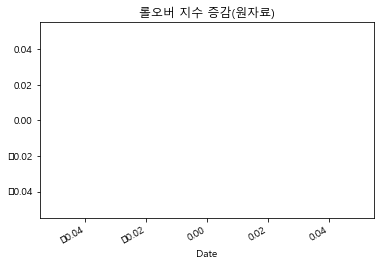

In [25]:
temp = df[df['exp']==1][['Second','Front']]
temp['diff'] =  temp['Second'] - temp['Front']
temp.head()
temp['diff'].plot()
plt.title("롤오버 지수 증감(원자료)")

In [26]:
rov_tot = np.array(df[df['exp']==1]['Second'] - df[df['exp']==1]['Front'] ).sum()
# 7년동안 매달 == 즉 84회 이자비용
rov_tot

0.0